In [ ]:
## 乳腺癌空间转录组中的结果

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']=' Times New Roman, SimSun'# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
plt.rcParams['font.size'] = 11  # 设置全局字体大小

import warnings
# 禁用所有警告
warnings.filterwarnings("ignore")

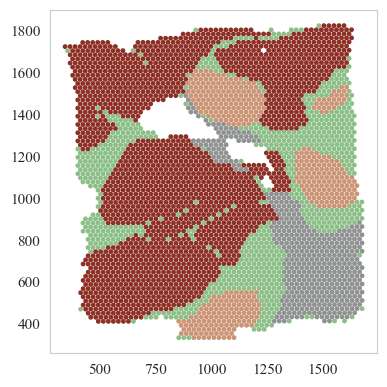

In [2]:
import matplotlib.colors as mcolors
metadata = pd.read_csv(r'E:\spatial-domain\data\BRCA\10x visium BRCA\metadata.tsv', sep='\t')
labels = metadata['annot_type']

# 标签到数字的映射
label_map = {'Invasive': 0, 'Tumor': 1, 'Surrounding tumor': 2, 'Healthy': 3}
numeric_labels = np.array([label_map[label] for label in labels])
# 定义颜色映射
cmap = mcolors.ListedColormap(['#8D2F25', '#CB9475', '#8CBF87', '#909291'])
plt.figure(figsize=(4, 4))
# 绘制散点图
scatter = plt.scatter(metadata['scaled_x'], metadata['scaled_y'], c=numeric_labels, cmap=cmap, s=6)

plt.grid(False)
plt.axis('off')

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-en\19.png",dpi=1000, bbox_inches='tight')
plt.show()

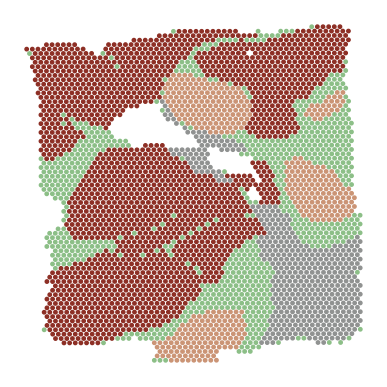

In [3]:
import matplotlib.colors as mcolors
metadata = pd.read_csv(r'E:\spatial-domain\data\BRCA\10x visium BRCA\metadata.tsv', sep='\t')
labels = metadata['annot_type']

# 标签到数字的映射
label_map = {'Invasive': 0, 'Tumor': 1, 'Surrounding tumor': 2, 'Healthy': 3}
numeric_labels = np.array([label_map[label] for label in labels])
# 定义颜色映射
cmap = mcolors.ListedColormap(['#8D2F25', '#CB9475', '#8CBF87', '#909291'])
plt.figure(figsize=(4, 4))
# 绘制散点图
scatter = plt.scatter(metadata['scaled_x'], metadata['scaled_y'], c=numeric_labels, cmap=cmap, s=6)

plt.grid(False)
plt.axis('off')

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\19.png",dpi=1000, bbox_inches='tight')
plt.show()

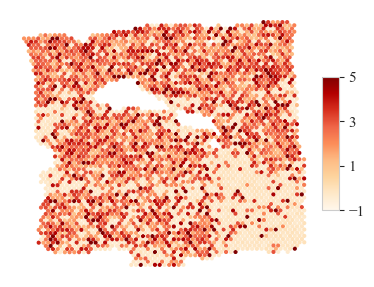

In [3]:
metadata = pd.read_csv(r'E:\spatial-domain\data\BRCA\10x visium BRCA\metadata.tsv', sep='\t')

df_singcell = pd.read_csv(r"E:\spatial-domain\results\BRCA\10x visium BRCA-HP_0000769.csv")
# labels = df_singcell['#expressedBRCAGenes']
labels = df_singcell['lcczscore']
# labels = df_singcell['lcc']

# 假设 labels 是一个数组或 Series，包含了每个点的标签值
min_label = np.min(labels)
max_label = np.max(labels)

fig, ax = plt.subplots(figsize=(4, 3))
# 绘制散点图
# scatter = ax.scatter(metadata['scaled_x'], metadata['scaled_y'], c=labels, cmap="OrRd", s=6)
scatter = plt.scatter(metadata['scaled_x'], metadata['scaled_y'], c=labels, cmap="OrRd", s=4,vmin=-1, vmax=5)
# 显示颜色条
# plt.colorbar(scatter)
# 颜色条
cbar = plt.colorbar(scatter, ax=ax, aspect=8, pad=0.01,shrink=0.5)  # 调整颜色条的大小和间距
# cbar.set_label("SC")
cbar.set_ticks([-1, 1, 3, 5])  # 指定刻度

plt.grid(False)
plt.axis('off')

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-en\20.png",dpi=1000)
plt.show()

In [4]:
'''空间域疾病状态的富集'''
metadata = pd.read_csv(r'E:\spatial-domain\data\BRCA\10x visium BRCA\metadata.tsv', sep='\t')
df_singcell = pd.read_csv(r"E:\spatial-domain\results\BRCA\10x visium BRCA-HP_0000769.csv")
labels = df_singcell['lcczscore']

# 获取df1中col1的唯一值
unique_values = metadata['annot_type'].unique()
# 遍历唯一值，获取对应的df2中的col2值
result = {}

for value in unique_values:
    # 在df1中筛选出col1为当前值的行
    filtered_df1 = metadata[metadata['annot_type'] == value]
    # 找到df2中与filtered_df1中other_col相同的行，并提取col2
    corresponding_col2 = df_singcell[df_singcell.index.isin(filtered_df1.index)]['lcczscore']
    # 将结果存储到字典中
    result[value] = corresponding_col2.tolist()

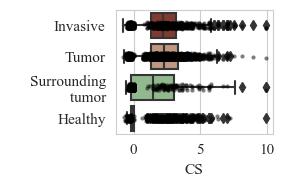

Surrounding tumor Invasive 0.999999999999965
Surrounding tumor Tumor 0.9999999948556936
Surrounding tumor Healthy 1.828631055903168e-06
Invasive Tumor 0.7811018698982486
Invasive Healthy 1.0583428314019902e-58
Tumor Healthy 1.1507723965661615e-35


In [10]:

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statannot import add_stat_annotation
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from scipy.stats import mannwhitneyu

# 将字典转换为一个 DataFrame 以便使用 seaborn 绘图
data = []
categories = []

for category, values in result.items():
    data.extend(values)
    categories.extend([category] * len(values))

# 创建 DataFrame
df = pd.DataFrame({'Domain': categories, 'LccZcore': data})

# 绘制小提琴图
plt.figure(figsize=(3, 2))
# 自定义颜色列表
custom_colors = ['#8D2F25', '#CB9475', '#8CBF87', '#909291']
# ax = sns.violinplot(x='Category', y='Value', data=df, palette="Set2",order=['Invasive','Tumor','Surrounding tumor','Healthy'])
ax = sns.boxplot(x='LccZcore', y='Domain', data=df, palette=custom_colors,order=['Invasive','Tumor','Surrounding tumor','Healthy'])
# ax = sns.boxplot(x='Domain', y='LccZcore', data=df, palette=custom_colors,order=['Invasive','Tumor','Surrounding tumor','Healthy'])
ax.set_ylabel(' ')
sns.stripplot(x='LccZcore', y='Domain', data=df, color='black', jitter=True, alpha=0.5,size = 3)
# **设置纵轴刻度**
ax.set_yticks([0, 1, 2, 3])  # 设定刻度位置
ax.set_yticklabels(['Invasive','Tumor','Surrounding\n tumor','Healthy'])  # 设定刻度标签

# **设置纵轴标签**
# ax.set_ylabel("Spatial Domain")
ax.set_xlabel("CS")

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-en\21.png",dpi=1000)
plt.show()


# 计算每两个列表之间的 Mann-Whitney U 检验值
regions = list(set(list(df['Domain'])))
p_values = {}
# 计算每两个区域之间的U检验
for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
        region_1 = regions[i]
        region_2 = regions[j]

        # 获取对应区域的数据
        data_1 = df[df['Domain'] == region_1]['LccZcore']
        data_2 = df[df['Domain'] == region_2]['LccZcore']

        # 进行Mann-Whitney U 检验（单侧检验，假设region_1 > region_2）
        stat, p = mannwhitneyu(data_1, data_2, alternative='greater')
        print(region_1, region_2, p)


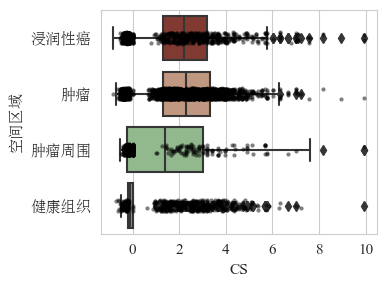

Surrounding tumor Tumor 0.9999999948556936
Surrounding tumor Healthy 1.828631055903168e-06
Surrounding tumor Invasive 0.999999999999965
Tumor Healthy 1.1507723965661615e-35
Tumor Invasive 0.21891928333290628
Healthy Invasive 1.0


In [41]:

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statannot import add_stat_annotation
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from scipy.stats import mannwhitneyu

# 将字典转换为一个 DataFrame 以便使用 seaborn 绘图
data = []
categories = []

for category, values in result.items():
    data.extend(values)
    categories.extend([category] * len(values))

# 创建 DataFrame
df = pd.DataFrame({'Domain': categories, 'LccZcore': data})

# 绘制小提琴图
plt.figure(figsize=(4, 3))
# 自定义颜色列表
custom_colors = ['#8D2F25', '#CB9475', '#8CBF87', '#909291']
# ax = sns.violinplot(x='Category', y='Value', data=df, palette="Set2",order=['Invasive','Tumor','Surrounding tumor','Healthy'])
ax = sns.boxplot(x='LccZcore', y='Domain', data=df, palette=custom_colors,order=['Invasive','Tumor','Surrounding tumor','Healthy'])
# ax = sns.boxplot(x='Domain', y='LccZcore', data=df, palette=custom_colors,order=['Invasive','Tumor','Surrounding tumor','Healthy'])
ax.set_ylabel(' ')
sns.stripplot(x='LccZcore', y='Domain', data=df, color='black', jitter=True, alpha=0.5,size = 3)
# **设置纵轴刻度**
ax.set_yticks([0, 1, 2, 3])  # 设定刻度位置
ax.set_yticklabels(["浸润性癌", "肿瘤", "肿瘤周围", "健康组织"])  # 设定刻度标签

# **设置纵轴标签**
ax.set_ylabel("空间区域")
ax.set_xlabel("CS")

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\21.png",dpi=1000)
plt.show()


# 计算每两个列表之间的 Mann-Whitney U 检验值
regions = list(set(list(df['Domain'])))
p_values = {}
# 计算每两个区域之间的U检验
for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
        region_1 = regions[i]
        region_2 = regions[j]

        # 获取对应区域的数据
        data_1 = df[df['Domain'] == region_1]['LccZcore']
        data_2 = df[df['Domain'] == region_2]['LccZcore']

        # 进行Mann-Whitney U 检验（单侧检验，假设region_1 > region_2）
        stat, p = mannwhitneyu(data_1, data_2, alternative='greater')
        print(region_1, region_2, p)


0.1
Healthy 485 22 0.9999991434238595
Invasive 2027 206 0.3855250204680237
Surrounding tumor 823 93 0.09241359554946622
Tumor 463 59 0.024556983263874767
0.2
Healthy 485 35 1.0
Invasive 2027 446 0.0010714802584249024
Surrounding tumor 823 170 0.3473725997493082
Tumor 463 113 0.009238615744601756
0.30000000000000004
Healthy 485 54 1.0
Invasive 2027 699 2.928159168546732e-09
Surrounding tumor 823 231 0.9554142280424988
Tumor 463 171 0.0007923886144868483
0.4
Healthy 485 71 1.0
Invasive 2027 946 4.847634191713311e-18
Surrounding tumor 823 288 0.9998121149809516
Tumor 463 225 6.818811744525051e-05
0.5
Healthy 485 92 1.0
Invasive 2027 1177 1.0755536344582177e-26
Surrounding tumor 823 357 0.9999927877409754
Tumor 463 273 2.2938492621408678e-05
0.6000000000000001
Healthy 485 104 1.0
Invasive 2027 1443 5.75636711194167e-51
Surrounding tumor 823 409 0.9999999999967036
Tumor 463 326 5.684473676805789e-07
0.7000000000000001
Healthy 485 202 1.0
Invasive 2027 1678 6.378005859493867e-59
Surrounding 

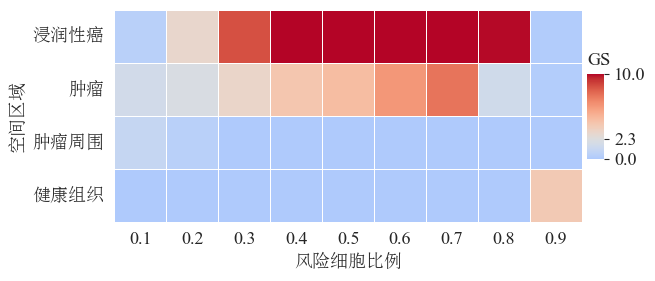

In [11]:
'''每个空间域的疾病富集情况'''
import seaborn as sns
import scipy.stats as stats
metadata = pd.read_csv(r'E:\spatial-domain\data\BRCA\10x visium BRCA\metadata.tsv', sep='\t')
df_singcell = pd.read_csv(r"E:\spatial-domain\results\BRCA\10x visium BRCA-HP_0000769.csv")

plt.rcParams['font.size'] = 13  # 设置全局字体大小

result = []
# 富集程度
for j in range(1,10):
    degree = 0.1 * j
    print(degree)

    # 计算 col1 列的前 10% 的阈值
    threshold = df_singcell['lcczscore'].quantile(1 - degree)
    # 筛选出 col1 值最大的前 10% 数据
    top_10_percent_df = df_singcell[df_singcell['lcczscore'] >= threshold]

    top = metadata.loc[top_10_percent_df.index]
    # 计算 col1 列中所有值的数量
    top_value_counts = top["annot_type"].value_counts()
    value_counts = metadata["annot_type"].value_counts()

    value_counts.sort_index(inplace=True)
    top_value_counts.sort_index(inplace=True)

    result_j = []
    for i in  top_value_counts.index:

        # 总体大小 (100个元素)
        M = top_value_counts.sum()  # 期望成功的元素数
        N = value_counts.sum()  # 总元素数
        n = value_counts.loc[i]   # 类别A中的元素数
        k = top_value_counts.loc[i]    # 类别A中的成功元素数

        # 使用超几何分布的 survival function 计算 P(X >= 5)
        p_value = stats.hypergeom.sf(k-1, N, M, n)
        print(i,n,k,p_value)
        result_j.append(p_value)
    result.append(result_j)
result_df = pd.DataFrame(result).T
# result_df.columns = [f"{i}%" for i in range(10, 100, 10)]
result_df.columns = [f'{i*0.1}' for i in range(1, 10)]

value_counts = metadata["annot_type"].value_counts()
value_counts.sort_index(inplace=True)
result_df.index = value_counts.index
result_df_sorted = result_df.reindex(['Invasive','Tumor','Surrounding tumor','Healthy'])
result_df_sorted.index=['浸润性癌','肿瘤','肿瘤周围','健康组织']
plt.figure(figsize=(7, 3))  # 设置图形大小
epsilon = 1e-10
x = -np.log10(0.005 + epsilon)
df= -np.log10(result_df_sorted+epsilon)
ax = sns.heatmap(df, cmap='coolwarm',linewidths = 0.5,
                center = x,
                 cbar_kws={'shrink': 0.4, 'aspect': 5, 'ticks': [0, x, 10], 'location': 'right',
                           "pad": 0.01,
                           'label':'GS'
                           }
                )

# 获取 colorbar 对象
cbar = ax.collections[0].colorbar
# 调整标签显示在上方
cbar.ax.yaxis.set_label_position('left') 
cbar.ax.yaxis.set_ticks_position('right')  # 设置 ticks 在上方

# 关键步骤！强制把标签移动到色条顶端 (1.05表示稍微在顶端外侧)
cbar.ax.set_ylabel("GS", rotation=0, labelpad=10)
cbar.ax.yaxis.set_label_coords(0.7, 1.05)  # 横向 1.4，纵向 1.02 (微调看效果)

# -------------------------
# 设置 x 轴标签为 1 位小数
# -------------------------
xticklabels = ['{:.1f}'.format(float(label.get_text())) for label in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels, rotation=0)  # 可加 rotation=45 或其他，视情况调整

# x.set_yticklabels(x.get_yticklabels(), rotation=0, ha='right')

# 设置图表标题和标签
ax.set_xlabel('风险细胞比例')  # 纵轴标签
ax.set_ylabel('空间区域')  # 横轴标签
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\22.png",dpi=1000)
plt.show()

In [63]:
# 读取背景网络
def openPPI(filename):
    '''
        打开PPI
        文件格式 gene1_name gene1_id gene2_name gene2_id
        返回值：网络[节点是gene name]
    '''
    G = nx.Graph()
    a=open(filename,"r")
    next(a)

    for i in a:
        n=i.strip().split("\t")
        G.add_edge(n[0],n[3])
        G.add_node(n[0])
        G.add_node(n[3])
    a.close()
    return G

In [65]:
# 计算最大连通分支
def Lcc(G,genename):
    '''
        输入图网络和一个列表，计算最大连通分支lcc
        G：图，这里图中的节点是基因name
        genename：用于计算lcc的genename列表
    '''

    g = nx.subgraph(G,genename)
    if len(genename)==0:
        largest = 0
        l = []
        return l,largest
    else:
        try:
            l = max(nx.connected_components(g),key=len)  #如果随机选取的gene没有连通分支的话，会报错，添加判断条件
            largest = len(l)     #最大联通分支
        except ValueError as e:
            l = genename[0]    # 假设genename列表中的第一个基因为最大连通分支
            largest = 1        #设置最大联通分支数为1
        return list(l),largest


['RP11-363D14.1', 'KANSL3', 'DUPD1', 'ARID5A', 'FER1L5', 'KAT6B']


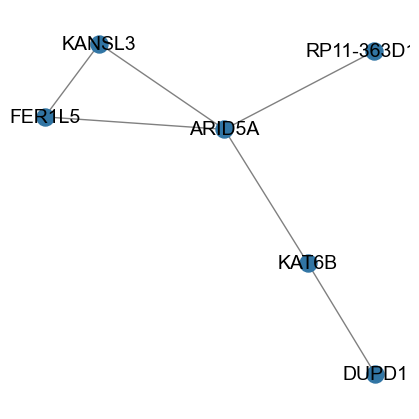

In [92]:
# 使用pandas读取疾病相关的基因文件
import networkx as nx
df = pd.read_csv(r'E:\spatial-domain\\data\BRCA\disease data\Abnormality of the breastHP_0000769.tsv', sep='\t')
disease_genes = list(df["geneName"])
G = openPPI(r"E:\00_CeSOP\data\network(process_id).txt")
subgraph = nx.subgraph(G,disease_genes)
l,lcc = Lcc(G,disease_genes)
subgraph1 = nx.subgraph(subgraph,l)
# plt.rcParams['font.size'] = 14  # 设置全局字体大小
# 使用 spring 布局进行绘制
# pos = nx.planar_layout(subgraph1)
plt.figure(figsize=(4, 4))
nx.draw(subgraph1,  with_labels=True, node_size=150, node_color='#3175A4', font_size=14, edge_color='gray')

print(l)

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\23.png",dpi=1000)
plt.show()

In [77]:
'''特定基因的表达'''
import h5py
from scipy.sparse import csr_matrix
h5_file = r"E:\spatial-domain\data\BRCA\10x visium BRCA\filtered_feature_bc_matrix.h5"

with h5py.File(h5_file, 'r') as f:
    data = f['matrix']['data'][:]
    indices = f['matrix']['indices'][:]
    indptr = f['matrix']['indptr'][:]
    genes_name = [str(x).split("'")[1] for x in f['matrix']['features']['name'][:]]

    # 假设矩阵有N行和M列，你可以从indptr的长度推算出行数
    n_rows = len(indptr) - 1  # 行数等于indptr长度减去1
    n_cols = len(genes_name)
    # 重建CSR矩阵
    sparse_matrix = csr_matrix((data, indices, indptr), shape=(n_rows, n_cols))  # 列数可以通过columns获取
    matrix = pd.DataFrame(sparse_matrix.toarray())
    matrix.columns = genes_name
    print(matrix)

      MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  AL627309.2  \
0               0        0      0           0           0           0   
1               0        0      0           0           0           0   
2               0        0      0           0           0           0   
3               0        0      0           0           0           0   
4               0        0      0           0           0           0   
...           ...      ...    ...         ...         ...         ...   
3793            0        0      0           0           0           0   
3794            0        0      0           0           0           0   
3795            0        0      0           0           0           0   
3796            0        0      0           0           0           0   
3797            0        0      0           0           0           0   

      AL627309.5  AL627309.4  AP006222.2  AL732372.1  ...  AC133551.1  \
0              0           0           0          

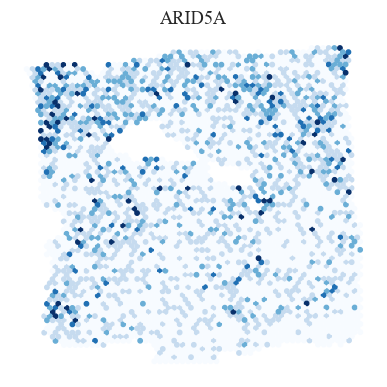

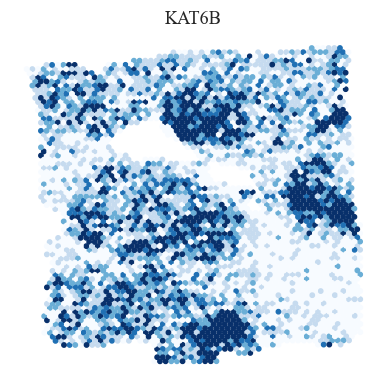

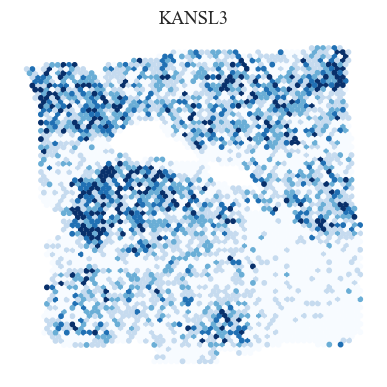

In [80]:

metadata = pd.read_csv(r'E:\spatial-domain\data\BRCA\10x visium BRCA\metadata.tsv', sep='\t')
genes = ['ARID5A','KAT6B','KANSL3']
for gene in genes:
    labels = matrix[gene]
    # 绘制散点图
    plt.figure(figsize=(4,4))
    # scatter = plt.scatter(metadata['scaled_x'], metadata['scaled_y'], c=labels, cmap="Blues", s=10,vmin=0.5, vmax=1)
    scatter = plt.scatter(metadata['scaled_x'], metadata['scaled_y'], c=labels, cmap="Blues", s=10,vmin=0, vmax=4)
    plt.title(gene)
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(r"E:\00_CeSOP\plot\figures\24_%s.png"%gene,dpi=1000)
    plt.show()
